In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('..'))
from modules import io

In [2]:
RADIUS_SMALL = 0.55
results_path = "../results"

data_key = 'TEST'

experiments = ['rf_2', 'rf_2_edge_fit',
               'rf_2_edge', 'rf_2_hessian',
               'rf_2_ct', 'rf_2_mr',
               'rf_2_augment_2', 'rf_2_augment_3',
               'split/rf_2_ct_aorta', 'split/rf_2_mr_aorta', 'split/rf_2_ct_coronary', 'split/rf_2_ct_aorta_45',
                'i2i_regression', 'i2i_regression_hessian']

labels = ['RF2', 'RF2-Efit',
          'RF2-E', 'RF2-H',
          'RF2-CT', 'RF2-MR',
          'RF2-A2', 'RF2-A3',
          'RF2-CT-Aorta', 'RF2-MR-Aorta', 'RF2-CT-Coronary', 'RF2-CT-Aorta-45',
            'I2I', 'I2I-H']

file_labels = ['rf_2', 'rf_2_edge_fit',
               'rf_2_edge', 'rf_2_hessian',
               'rf_2_ct', 'rf_2_mr',
               'rf_2_augment_2', 'rf_2_augment_3',
               'rf_2_aorta', 'rf_2_mr_aorta', 'rf_2_ct_coronary', 'rf_2_ct_aorta_45',
              'i2i_regression', 'i2i_regression_hessian']

colors = ["#4878D0", "#4878D0",
          "#6ACC64", "#6ACC64",
          "#D65F5F", "#D65F5F",
          "#956CB4", "#956CB4",
          "#82C6E2", "#82C6E2", "#82C6E2", "#82C6E2",
         "#D5BB67","#D5BB67"]

markers = ['o', '^',
           'o', '^',
           'o', '^',
           'o', '^',
           'o', '^', '*', 's',
          'o','^']

hatch   = ['', '/',
           '', '/',
           '', '/',
           '', '/',
           '', '/', '+', '^',
          '','/']

In [3]:
dataframes = []
names = []
for e in experiments:
    fn = '../config/{}.yaml'.format(e)
    config = io.load_yaml(fn)
    
    names.append(config['NAME'])
    
    data_fn = "{}/{}/{}/{}.csv".format(
        results_path, config['NAME'], data_key.lower(), data_key 
    )
    
    df = pd.read_csv(data_fn)
    print(e, df.shape)
    dataframes.append(df)
    
data = pd.concat(dataframes,axis=0)
print(data.shape)
print(data.columns)

rf_2 (6058, 9)
rf_2_edge_fit (6088, 9)
rf_2_edge (6088, 9)
rf_2_hessian (6058, 9)
rf_2_ct (1773, 9)
rf_2_mr (2985, 9)
rf_2_augment_2 (6058, 9)
rf_2_augment_3 (6058, 9)
split/rf_2_ct_aorta (164, 9)
split/rf_2_mr_aorta (79, 9)
split/rf_2_ct_coronary (221, 9)
split/rf_2_ct_aorta_45 (161, 9)
i2i_regression (6088, 9)
i2i_regression_hessian (6058, 9)
(53937, 9)
Index(['Unnamed: 0', 'ASSD', 'HAUSDORFF', 'dice', 'image', 'model_name',
       'path_name', 'point', 'radius'],
      dtype='object')


/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


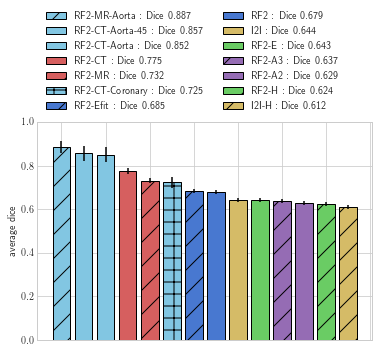

In [4]:
plt.figure()
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('../figures/dice_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


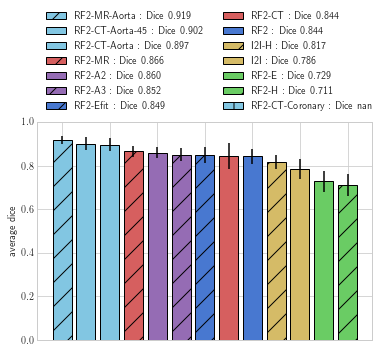

In [5]:
plt.figure()
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    d = d.loc[d['radius']>RADIUS_SMALL]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('../figures/dice_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


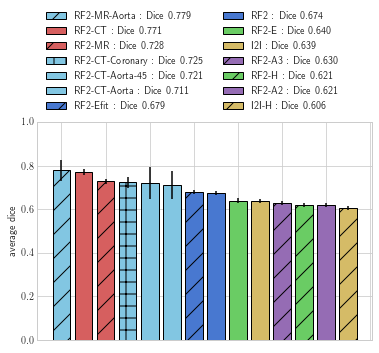

In [6]:
plt.figure()
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    d = d.loc[d['radius']<=RADIUS_SMALL]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('../figures/dice_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


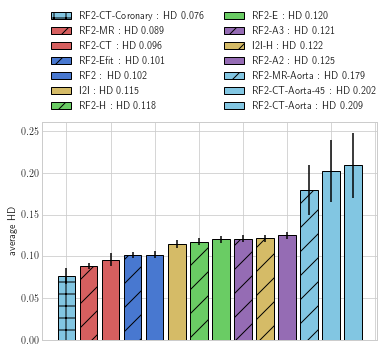

In [7]:
plt.figure()
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['HAUSDORFF']  = np.mean(d['HAUSDORFF'])
    t['err']   = np.std(d['HAUSDORFF'])/np.sqrt(len(d['HAUSDORFF']))
    
    t['label'] = labels[i] + ' : HD {0:.3f}'.format(t['HAUSDORFF'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: x['HAUSDORFF'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['HAUSDORFF'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average HD')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
#plt.ylim(0,1)
plt.savefig('../figures/hd_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


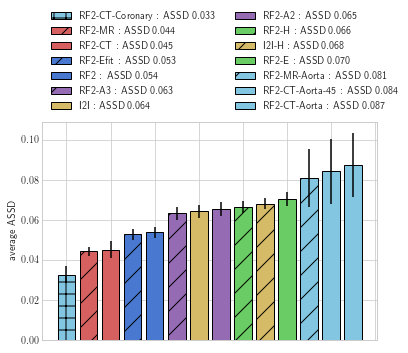

In [8]:
plt.figure()
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['ASSD']  = np.mean(d['ASSD'])
    t['err']   = np.std(d['ASSD'])/np.sqrt(len(d['ASSD']))
    
    t['label'] = labels[i] + ' : ASSD {0:.3f}'.format(t['ASSD'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: x['ASSD'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['ASSD'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average ASSD')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
#plt.ylim(0,1)
plt.savefig('../figures/assd_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

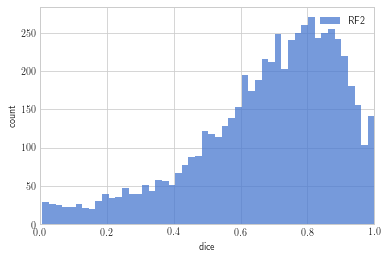

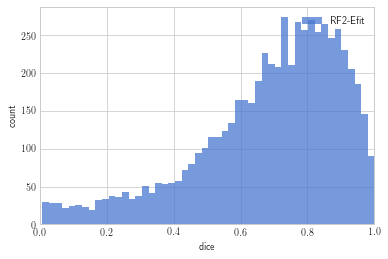

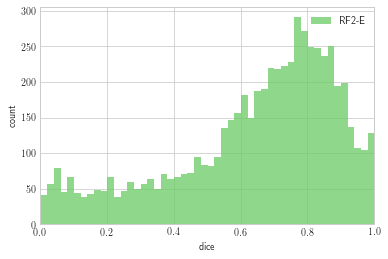

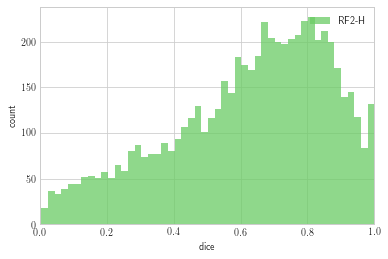

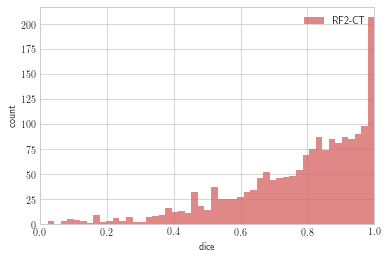

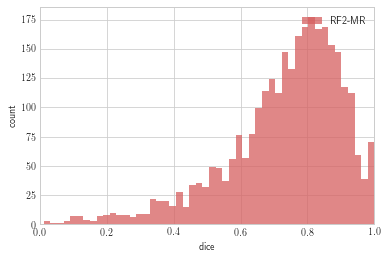

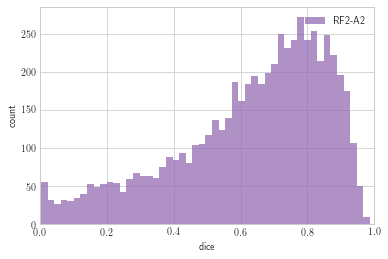

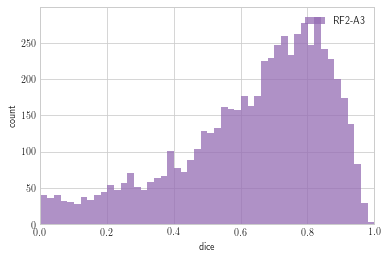

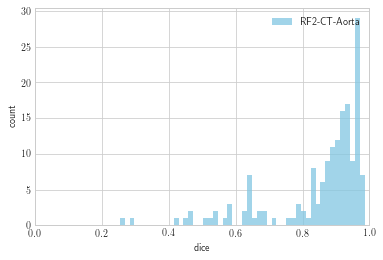

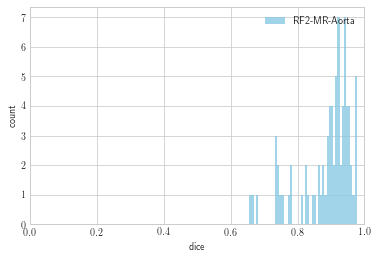

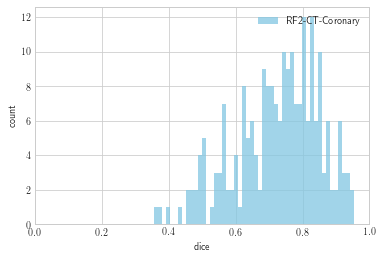

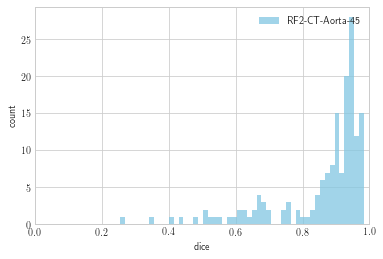

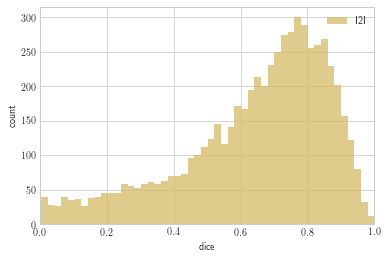

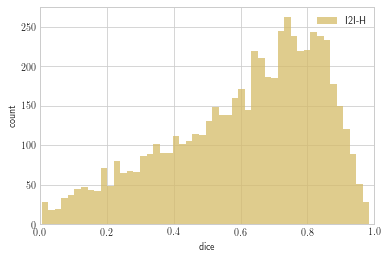

In [9]:
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    label = labels[i]
    file_label = file_labels[i]
    color = colors[i]
    
    plt.figure()
    plt.hist(d['dice'], bins=50, alpha=0.75, color=color, label=label)

    plt.xlabel('dice')
    plt.ylabel('count')
    plt.xlim(0,1)
    plt.legend(loc='upper right')
    plt.savefig('../figures/dice_hist_{}.pdf'.format(file_label),dpi=500)
    plt.show()